# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (12)

# `ÁLEJANDRO SÁNCHEZ MONZÓN`

**20/11/2023**

# 1. Aprendizaje de máquina (automático):   **Machine Learning**

---

In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

In [3]:
from sklearn.datasets import load_wine

# Construimos un dataframe con los datos medidos 
dataset_vino = pd.DataFrame(load_wine()["data"], columns=load_wine()["feature_names"])

# Añadimos la especie como etiqueta
dataset_vino["label"] = load_wine()["target_names"][load_wine()["target"]]

dataset_vino

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [4]:
# Filtrar los datos numéricos
df_vino_num = dataset_vino.drop("label", axis='columns')
df_vino_num

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Procedemos a estandarizar el contenido de las variables del dataset:

In [5]:
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import StandardScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado_v = StandardScaler().fit(df_vino_num)
dataset_vino_normal = escalado_v.transform(df_vino_num)
dataset_vino_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [6]:
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
df_vino_normal = pd.DataFrame(dataset_vino_normal, columns=df_vino_num.columns)
print(type(df_vino_normal))
df_vino_normal

<class 'pandas.core.frame.DataFrame'>


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


### **Planteamiento del problema**: Identificar los vinos que son de ***clase_2*** 

In [7]:
# Definimos una variable binaria según el planteamiento del problema
df_vino_normal['etiqueta'] = dataset_vino['label'].apply(lambda x: 1 if x=="class_2" else 0)
df_vino_normal

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,etiqueta
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1


---

### **`Ejercicio 12`**

Vamos a realizar un estudio para crear varios clasificadores tipo *Logit* según el planteamiento definido anteriormente:

**`12.1`** Construye de la misma manera que el último ejercicio de la sesión, todos los modelos posibles de clasificación con solamente **dos variables de entrada** dentro de todo el conjunto de características presentes en el dataset. Evalúa cada modelo que se construye para cada par de variables calculando su `accuracy`, `f1-score` del `"macro avg"` y el área bajo la curva _ROC_ (`roc_auc_score`).

  - para _train_test_split_ >> `test_size=0.25`, `random_state=88`
  - para _LogisticRegression_ >> `random_state=100`
  - \*_recomendación_: puedes crear un diccionario para ir guardando la combinación de cada par de variables junto con sus métricas correspondientes y crear un _DataFrame_ al final en base a estos registros guardados en el diccionario.   
   
**`12.2`** Encuentra aquellas combinaciones de dos variables que su clasificador sea literalmente perfecto! 
  - _accuracy_=1
  - _f1-score_=1
  - *roc_auc_score*=1

**`12.3`** Estudia y analiza las relaciones entre las variables del dataset creando una gráfica tipo `pairplot` y pintandolo en base a la columna `'etiqueta'` usando solamente las variables que estén en los mejores modelos identificados en el paso anterior. 

In [8]:
df_vino_normal.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'etiqueta'],
      dtype='object')

In [9]:
## Solución
# Ejercicio 12.1
variables = df_vino_normal.columns[:-1]
variables

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [10]:
import itertools

combinaciones = list(itertools.combinations(variables, 2))
combinaciones

[('alcohol', 'malic_acid'),
 ('alcohol', 'ash'),
 ('alcohol', 'alcalinity_of_ash'),
 ('alcohol', 'magnesium'),
 ('alcohol', 'total_phenols'),
 ('alcohol', 'flavanoids'),
 ('alcohol', 'nonflavanoid_phenols'),
 ('alcohol', 'proanthocyanins'),
 ('alcohol', 'color_intensity'),
 ('alcohol', 'hue'),
 ('alcohol', 'od280/od315_of_diluted_wines'),
 ('alcohol', 'proline'),
 ('malic_acid', 'ash'),
 ('malic_acid', 'alcalinity_of_ash'),
 ('malic_acid', 'magnesium'),
 ('malic_acid', 'total_phenols'),
 ('malic_acid', 'flavanoids'),
 ('malic_acid', 'nonflavanoid_phenols'),
 ('malic_acid', 'proanthocyanins'),
 ('malic_acid', 'color_intensity'),
 ('malic_acid', 'hue'),
 ('malic_acid', 'od280/od315_of_diluted_wines'),
 ('malic_acid', 'proline'),
 ('ash', 'alcalinity_of_ash'),
 ('ash', 'magnesium'),
 ('ash', 'total_phenols'),
 ('ash', 'flavanoids'),
 ('ash', 'nonflavanoid_phenols'),
 ('ash', 'proanthocyanins'),
 ('ash', 'color_intensity'),
 ('ash', 'hue'),
 ('ash', 'od280/od315_of_diluted_wines'),
 ('ash'

In [11]:
len(combinaciones)

78

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

resultados = {}

for var1, var2 in combinaciones:
    X_vino_12_1 = df_vino_normal[[var1, var2]]
    y_vino_12_1 = df_vino_normal['etiqueta']

    X_train_12_1, X_test_12_1, y_train_12_1, y_test_12_1 = train_test_split(X_vino_12_1, y_vino_12_1, test_size=0.25, random_state=88)

    lr_12_1 = LogisticRegression(random_state=100)
    lr_12_1.fit(X_train_12_1, y_train_12_1)

    y_pred_12_1 = lr_12_1.predict(X_test_12_1)

    accuracy = accuracy_score(y_test_12_1, y_pred_12_1)
    f1 = f1_score(y_test_12_1, y_pred_12_1, average='macro')
    roc_auc = roc_auc_score(y_test_12_1, y_pred_12_1)

    resultados[(var1, var2)] = {
        'accuracy': accuracy,
        'f1': f1,
        'roc_auc': roc_auc
    }


In [13]:
df_resultados = pd.DataFrame.from_dict(resultados, orient='index')
df_resultados

accuracy        f1  \
alcohol                      malic_acid                    0.822222  0.742857   
                             ash                           0.800000  0.444444   
                             alcalinity_of_ash             0.777778  0.519231   
                             magnesium                     0.800000  0.444444   
                             total_phenols                 0.977778  0.966642   
...                                                             ...       ...   
color_intensity              od280/od315_of_diluted_wines  0.955556  0.930556   
                             proline                       0.911111  0.847973   
hue                          od280/od315_of_diluted_wines  0.955556  0.923986   
                             proline                       0.933333  0.891217   
od280/od315_of_diluted_wines proline                       0.955556  0.935714   

                                                            roc_auc  
alcohol                      malic_acid                    0.763889  
                             ash                           0.500000  
                             alcalinity_of_ash             0.527778  
                             magnesium                     0.500000  
                             total_phenols                 0.986111  
...                                                             ...  
color_intensity              od280/od315_of_diluted_wines  0.930556  
                             proline                       0.819444  
hue                          od280/od315_of_diluted_wines  0.888889  
                             proline                       0.875000  
od280/od315_of_diluted_wines proline                       0.972222  

[78 rows x 3 columns]

In [14]:
## Solución
# Ejercicio 12.2
df_perfectos = df_resultados[(df_resultados['accuracy'] == 1) & (df_resultados['f1'] == 1) & (df_resultados['roc_auc'] == 1)]
df_perfectos

accuracy   f1  roc_auc
flavanoids color_intensity       1.0  1.0      1.0
           hue                   1.0  1.0      1.0

In [15]:
## Solución
# Ejercicio 12.3

# Iba a usar un bucle para obtener una lista de strings con los indices de las variables perfectas, 
# pero he visto que itertools tiene la herramienta chain, que es capaz de convertir una tupla a una lista de string directamente.
# (https://docs.python.org/3/library/itertools.html#itertools.chain)

variables_perfectas = list(itertools.chain(*df_perfectos.index.tolist()))

In [16]:
variables_perfectas

['flavanoids', 'color_intensity', 'flavanoids', 'hue']

c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


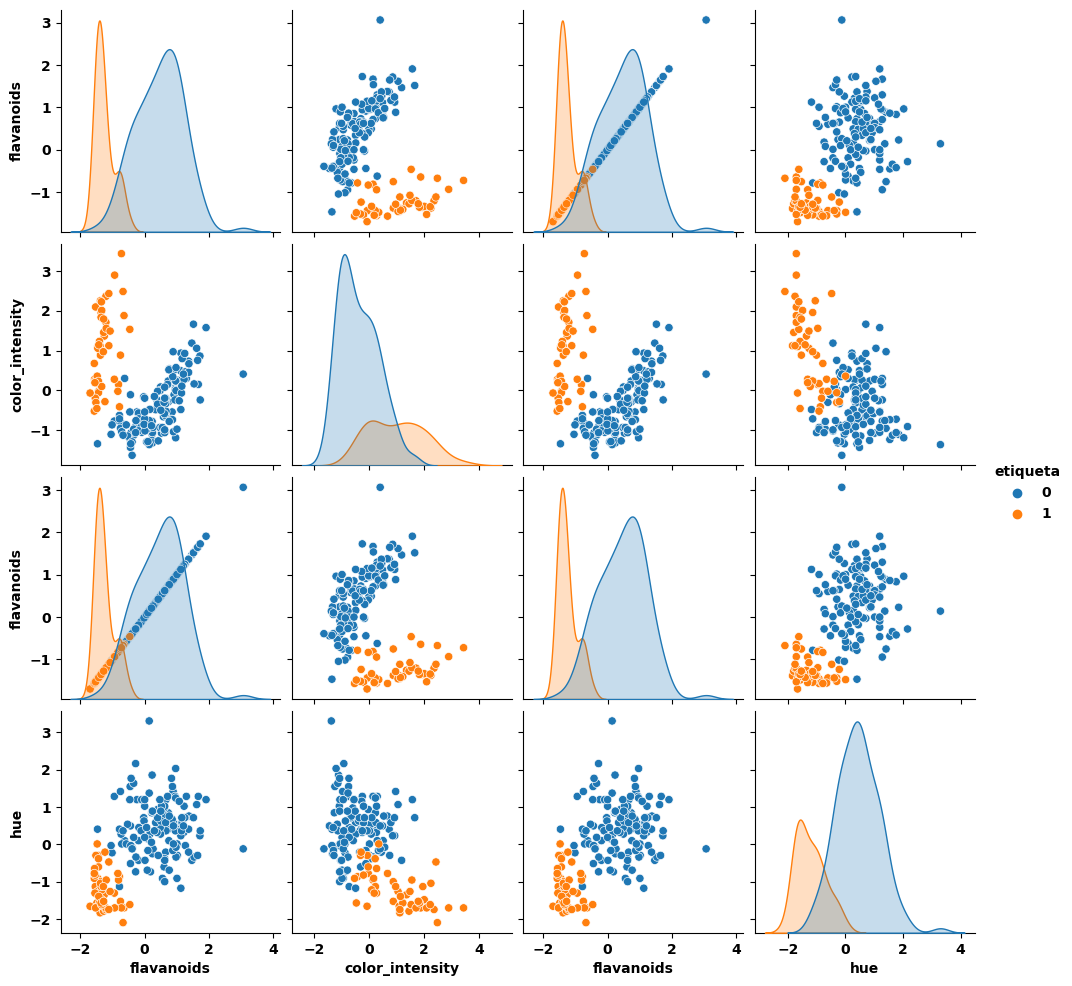

In [17]:
sns.pairplot(df_vino_normal, vars=variables_perfectas, hue='etiqueta')

> #### Explicación 12.3
> Con esta grápica de tipo **pairplot**, podemos observar que, como realmente hemos obtenido los pares de variables que son **"más clasificatorios"** en relacion a nuestro dataset, las gráficas que muestran las relaciones entre estas variables son **bastante útiles para poder hacer una clasificación**. Lo que quiero decir con esto es que, como podemos observar en las gráficas y en los **histogramas** para cada variable, apenas se aprecia una dispersión de los valores muy mezclada, lo que nos permite ver relativamente bien **la división entre los dos grupos de etiquetas**.
>
> Estos es sin duda  forma de clasificar los datos astante útil, al menos a simple vista, ya que recibiendo valores para las variables aqui presentes, y analizando el **pairplot**, podriamos tratar de deducir, con una **probabilidad de acierto más alta** que de forma aleatoria, cual será la etiqueta de dicho vino.
>
> Un ejemplo de esta "facilidad" para relacionar las variables y obtener deducciones podría ser, por ejemplo, **color_intensity y flavanoids**, donde para valores de **eje x** muy bajos, pero muy altos de **eje y**, existe una mayor cantidad de valores para vinos con etiqueta 1 (naranja), mientras que para valores de **x** medios y altos y de **y** medios y bajos, los valores predominantes son para la etiqueta 0 (azul).